# [Maven Churn Challenge](https://mavenanalytics.io/challenges/maven-churn-challenge/6)

Help a telecommunications company improve retention by analyzing their CRM data to identify high-value customers and churn risks.

## Challenge Objective

For this challenge, you'll be assuming the role of a BI Consultant for Maven Communications, a California-based Telecommunications company.

You've been hired to help the company improve retention by identifying high value customers and churn risks, and have been asked to present your findings to the CMO in the form of a single page report or dashboard.

# [About The Data Set](https://maven-datasets.s3.amazonaws.com/Telecom+Customer+Churn/Telecom+Customer+Churn.zip)

Churn data for a fictional Telecommunications company that provides phone and internet services to 7,043 customers in California, and includes details about customer demographics, location, services, and current status.

# Notebook Setup

In [ ]:
# Importing pandas for data analysis and manipulation
import pandas as pd
# Importing numpy for numerical computations
import numpy as np
# Importing seaborn for data visualization
import seaborn as sns
# Importing pyplot from matplotlib for data visualization
import matplotlib.pyplot as plt
# Importing pyplot from matplotlib.dates for dates manipulation
import matplotlib.dates as mdates
# Importing tqdm for progress bars in loops
from tqdm.notebook import tqdm

# Importing warnings module to handle warning messages
import warnings

# Setting the max columns to be shown by pandas to 500
pd.options.display.max_columns = 500

# Showing the full content of columns
pd.set_option("display.max_colwidth", None)

# To ignore all warnings generated by the program
warnings.filterwarnings("ignore")

# Setting seaborn style to white
sns.set_style("white")

# Removing grid
sns.set_style("whitegrid", {"grid.linestyle": "none"})

# ⏬ Downloading and Loading the Dataset

In [ ]:
# Downloading and unzpipping the dataset
import requests
import zipfile
import os

url = "https://maven-datasets.s3.amazonaws.com/Telecom+Customer+Churn/Telecom+Customer+Churn.zip"
zip_file_name = "Telecom+Customer+Churn.zip"
dest_dir = "Telecom+Customer+Churn"

if not os.path.exists(zip_file_name):
  print("Downloading {}...".format(url))
  response = requests.get(url, stream=True)
  with open(zip_file_name, "wb") as f:
    for chunk in response.iter_content(chunk_size=1024):
      f.write(chunk)

print("Unzipping {}...".format(zip_file_name))
with zipfile.ZipFile(zip_file_name, "r") as zip_ref:
  zip_ref.extractall(dest_dir)

print("Done.")

# Print the tree of the folder and the containing files
def print_tree(directory):
  for entry in os.listdir(directory):
    full_path = os.path.join(directory, entry)
    if os.path.isdir(full_path):
      print("Directory:", entry)
      print_tree(full_path)
    else:
      print("File:", entry)

print_tree("Telecom+Customer+Churn")

Unzipping Telecom+Customer+Churn.zip...
Done.
File: telecom_customer_churn.csv
File: telecom_zipcode_population.csv
File: telecom_data_dictionary.csv


# 🔍 Inspecting the data

- Metadata
- Null Values
- Duplicates
- Summary Statistics

In [ ]:
# Loading the dataset
df = pd.read_csv("/content/Telecom+Customer+Churn/telecom_customer_churn.csv")

In [ ]:
# Takking a look at a sample from the dataset
df.sample(3)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
4390,6188-UXBBR,Female,47,Yes,0,Fresno,93720,36.878709,-119.764500,1,38,Offer C,Yes,10.54,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,One Year,Yes,Credit Card,20.25,814.75,0.0,0,400.52,1215.27,Stayed,NaN,NaN
4947,6967-QIQRV,Male,23,Yes,1,Mission Viejo,92692,33.606930,-117.644253,8,15,None,Yes,2.12,No,Yes,Fiber Optic,30.0,Yes,No,No,Yes,Yes,Yes,Yes,No,One Year,No,Bank Withdrawal,101.90,1667.25,0.0,120,31.80,1819.05,Stayed,NaN,NaN
4725,6653-CBBOM,Female,57,No,0,Compton,90221,33.885811,-118.206459,0,1,Offer E,Yes,15.92,No,Yes,Fiber Optic,11.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,70.30,70.30,0.0,0,15.92,86.22,Churned,Dissatisfaction,Service dissatisfaction


In [ ]:
# Inspecting the metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [ ]:
# Identify columns with null values
null_cols = df.columns[df.isnull().any()]

# Create a concise summary DataFrame with null values, percentages, and data types
null_summary = (
    pd.DataFrame(
        {
            "Column Name": null_cols,
            "Null Value Counts": df[null_cols].isnull().sum(),
            "Percentage of Null Values": df[null_cols].isnull().mean() * 100,
            "Column Data Type": df[null_cols].dtypes,
        }
    )
    .sort_values(by="Null Value Counts", ascending=False)
    .reset_index(drop=True)
)

# Format the percentage column to have the % sign
null_summary["Percentage of Null Values"] = null_summary[
    "Percentage of Null Values"
].map("{:.2f}%".format)

# Display the null summary DataFrame
null_summary

,Column Name,Null Value Counts,Percentage of Null Values,Column Data Type
0,Churn Category,5174,73.46%,object
1,Churn Reason,5174,73.46%,object
2,Internet Type,1526,21.67%,object
3,Avg Monthly GB Download,1526,21.67%,float64
4,Online Security,1526,21.67%,object
5,Online Backup,1526,21.67%,object
6,Device Protection Plan,1526,21.67%,object
7,Premium Tech Support,1526,21.67%,object
8,Streaming TV,1526,21.67%,object
9,Streaming Movies,1526,21.67%,object


In [ ]:
# Identifying columns with duplicated values and their counts
dup_values = df.duplicated().sum()

print(f"There are {dup_values} duplicated values in the dataset.")

There are 0 duplicated values in the dataset.


In [ ]:
# Summary Statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7043.0,46.509726,16.750352,19.000000,32.000000,46.000000,60.000000,80.000000
Number of Dependents,7043.0,0.468692,0.962802,0.000000,0.000000,0.000000,0.000000,9.000000
Zip Code,7043.0,93486.070567,1856.767505,90001.000000,92101.000000,93518.000000,95329.000000,96150.000000
Latitude,7043.0,36.197455,2.468929,32.555828,33.990646,36.205465,38.161321,41.962127
Longitude,7043.0,-119.756684,2.154425,-124.301372,-121.788090,-119.595293,-117.969795,-114.192901
Number of Referrals,7043.0,1.951867,3.001199,0.000000,0.000000,0.000000,3.000000,11.000000
Tenure in Months,7043.0,32.386767,24.542061,1.000000,9.000000,29.000000,55.000000,72.000000
Avg Monthly Long Distance Charges,6361.0,25.420517,14.200374,1.010000,13.050000,25.690000,37.680000,49.990000
Avg Monthly GB Download,5517.0,26.189958,19.586585,2.000000,13.000000,21.000000,30.000000,85.000000
Monthly Charge,7043.0,63.596131,31.204743,-10.000000,30.400000,70.050000,89.750000,118.750000


#🔬📐 Feature Engineering | Customer Value Metric (`CVM`)

➡ Aligning with the **Challenge Objective**:

> *You've been hired to help the company improve retention by identifying high-value customers and churn risks. Present your findings to the CMO in a single-page report or dashboard.*

While the dataset lacks a direct customer value metric, such as "Customer Lifetime Value" (CLV) we'll create one through feature engineering, leveraging existing data.



## 🧮 Calculating the (`CVM`) Customer Value Metric

To Calculate the (`CVM`), we'll use a correlation matrix to assess relationships between each column and the `Customer Status` column. This matrix provides correlation coefficients, uncovering potential indicators of customer value.

Using these coefficients, we identify columns strongly linked to customer status. Further analysis will help reveal and examine patterns aligning with high customer value or churn risks.



In [ ]:
# Convert Customer Status field to categorical dtype
df["Customer Status"] = df["Customer Status"].astype("category")

# Calculate correlation of all numeric columns with encoded Customer Status
# Take absolute value of correlations and average correlations per column
# Sort by descending correlation and keep top 10 columns
corr_df = (
    df.select_dtypes(["float64", "int64"])
    .apply(lambda x: x.corr(df["Customer Status"].cat.codes))
    .abs()
    .groupby(level=0)
    .mean()
    .sort_values(ascending=False)
    .to_frame(name="Correlation")
    .round({"Correlation": 2})
)[:10]

# Print top 10 correlated columns
corr_df

,Correlation
Tenure in Months,0.45
Number of Referrals,0.31
Total Revenue,0.30
Total Long Distance Charges,0.29
Total Charges,0.27
Number of Dependents,0.23
Monthly Charge,0.14
Age,0.10
Avg Monthly GB Download,0.09
Total Refunds,0.05


### 💲💸 What makes a customer valuable ?

After examining the correlation matrix, I have identified key columns that could serve as indicators for calculating the Customer Value Metric (`CVM`). To ensure the accuracy of our analysis, I will further investigate the distribution, variability, and other relevant factors of the following columns:

*   `Tenure in Months`: This metric represents customer loyalty and the duration of their association with our network.
*   `Number of Referrals`: Indicates customers who actively bring in more clients to our network.
*   `Total Revenue`: The total revenue generated from the customer throughout their entire tenure.
*   `Total Charges`: Represents the client's total quarterly charge.
*   `Monthly Charge`: Signifies the client's total monthly charge.

By delving into the distribution and variability of these variables, we aim to avoid skewing the data and ensure the accuracy of our analysis. This step is crucial in building a robust Customer Value Metric that aligns with the company's objective of improving retention and identifying high-value customers and churn risks.

### 🔧🚧 Analysis Setup

- Selecting relevent column to the `CVM` calculation.
- Converting column datatypes for performance optimization.

In [ ]:
# Create a customer dataframe that has the selected columns
cvm_cols = df[
    [
        "Customer ID",
        "Tenure in Months",
        "Number of Referrals",
        "Total Revenue",
        "Total Charges",
        "Monthly Charge",
        "Contract",
    ]
]

In [ ]:
cvm_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer ID          7043 non-null   object 
 1   Tenure in Months     7043 non-null   int64  
 2   Number of Referrals  7043 non-null   int64  
 3   Total Revenue        7043 non-null   float64
 4   Total Charges        7043 non-null   float64
 5   Monthly Charge       7043 non-null   float64
 6   Contract             7043 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 385.3+ KB


### 🔎 Examining the `Tenure in Months` Column

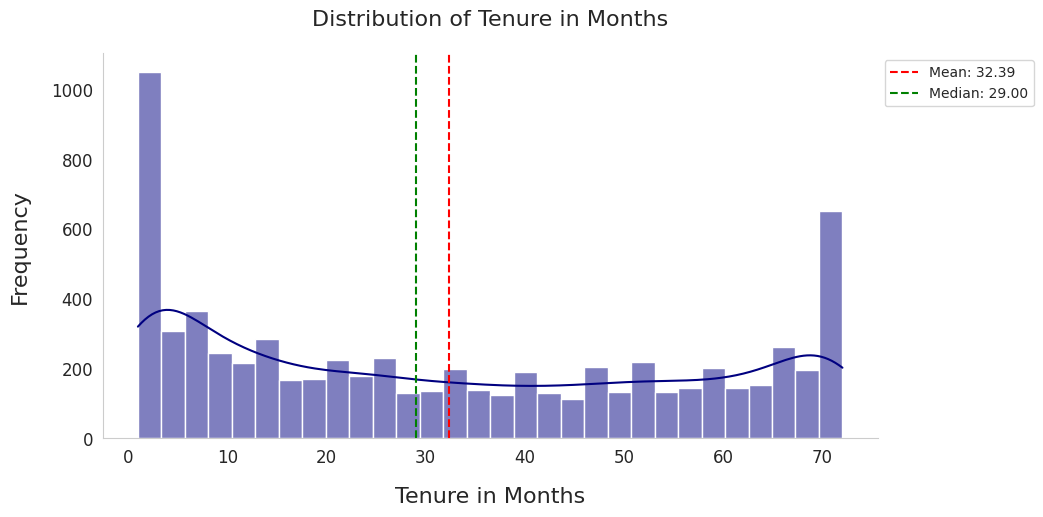

In [ ]:
# Plotting the distribution of 'Tenure in Months' with seaborn
plt.figure(figsize=(10, 5))
sns.histplot(cvm_cols["Tenure in Months"], kde=True, color="navy", bins=30)

# Highlighting mean and median
mean_value = cvm_cols["Tenure in Months"].mean()
median_value = cvm_cols["Tenure in Months"].median()

# Highlighting mean and median
plt.axvline(x=mean_value, color="red", linestyle="--", label=f"Mean: {mean_value:.2f}")
plt.axvline(
    x=median_value, color="green", linestyle="--", label=f"Median: {median_value:.2f}"
)

# Despine the plot and add space
sns.despine()

# Improved adjustments
plt.title("Distribution of Tenure in Months", fontsize=16, pad=20)
plt.xlabel("Tenure in Months", fontsize=16, labelpad=15)
plt.ylabel("Frequency", fontsize=16, labelpad=15)

# Adjusting spacing between axis labels and ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Relocating legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Removing grid
plt.grid(False)

# Show the plot
plt.show()

In [ ]:
cvm_cols["Tenure in Months"].describe()

count    7043.000000
mean       32.386767
std        24.542061
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure in Months, dtype: float64

> **The distribution of `Tenure in Months` is right-skewed**, as the **mean (34.5)** is greater than the **median (32)**. This indicates that there are relatively few customers with very long tenures, pulling the mean to the right.

> The **interquartile range (IQR)**, the range between the **25th and 75th percentiles (12 to 57 months)**, shows the middle 50% of the data. The spread of the data, as indicated by the **standard deviation (23.97)**, is moderate.

### 🔎 Examining the `Number of Referrals` Column

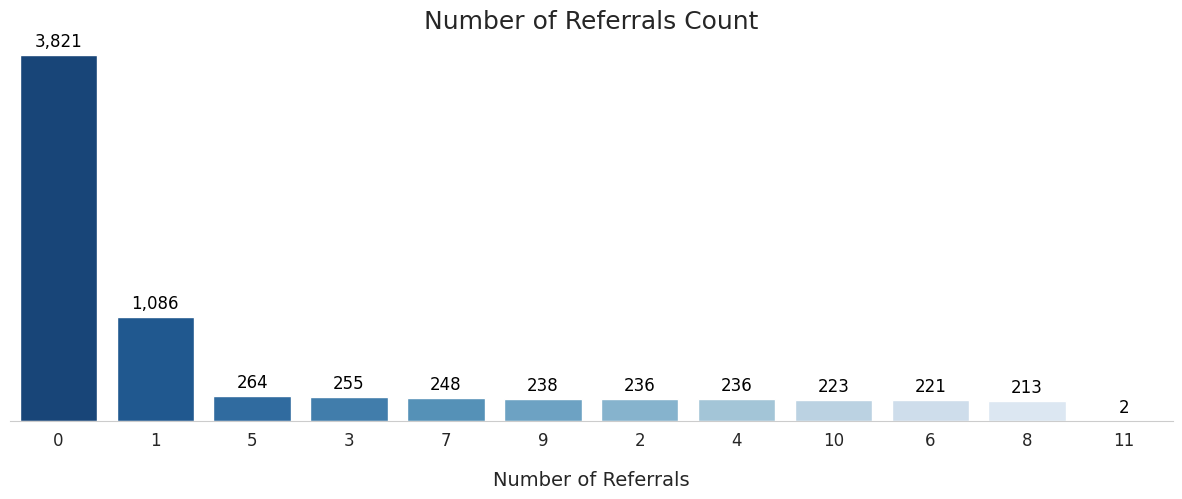

In [ ]:
from matplotlib.ticker import FuncFormatter

# Choose a solid color palette
color_palette = "Blues_r"

# Create the count plot with specified color palette, sorting bars in descending order
plt.figure(figsize=(15, 5))
sns.countplot(
    x="Number of Referrals",
    data=cvm_cols,
    palette=color_palette,
    order=cvm_cols["Number of Referrals"].value_counts().index,
)


# Set title and axis-labels
plt.title("Number of Referrals Count", fontsize=18)
plt.xlabel("Number of Referrals", fontsize=14, labelpad=15)
plt.ylabel("")  # Removing the y-label

# Set axis ticks fontsize
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove y-axis ticks
plt.yticks([])


# Annotate the count above each bar in thousands with comma formatting, increase font size
def format_thousands_with_comma(x, pos):
    return f"{x:,.0f}"


formatter = FuncFormatter(format_thousands_with_comma)
for p in plt.gca().patches:
    plt.gca().annotate(
        f"{formatter(p.get_height())}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        fontsize=12,  # Increase font size
        color="black",
        xytext=(0, 10),
        textcoords="offset points",
    )


# Despine the plot
sns.despine(left=True)

# Show the plot
plt.show()

In [ ]:
cvm_cols["Number of Referrals"].value_counts(normalize=True,
                                             sort=True
                                             ) * 100

0     54.252449
1     15.419566
5      3.748403
3      3.620616
7      3.521227
9      3.379242
2      3.350845
4      3.350845
10     3.166264
6      3.137867
8      3.024279
11     0.028397
Name: Number of Referrals, dtype: float64

> **A majority (3821 instances) have 0 referrals,** emphasizing non-referring customers.

> **Customers with 1 referral are the second most common,** indicating significant but singular engagement. Varied counts from 0 to 11 show most customers with lower counts.

> **Higher referral counts (6 or more) are less common,** with only two instances of 11 referrals. **Overall, the data emphasizes a prevalence of customers with minimal or no referrals.**

### 🔎 Examining the `Total Charges` column

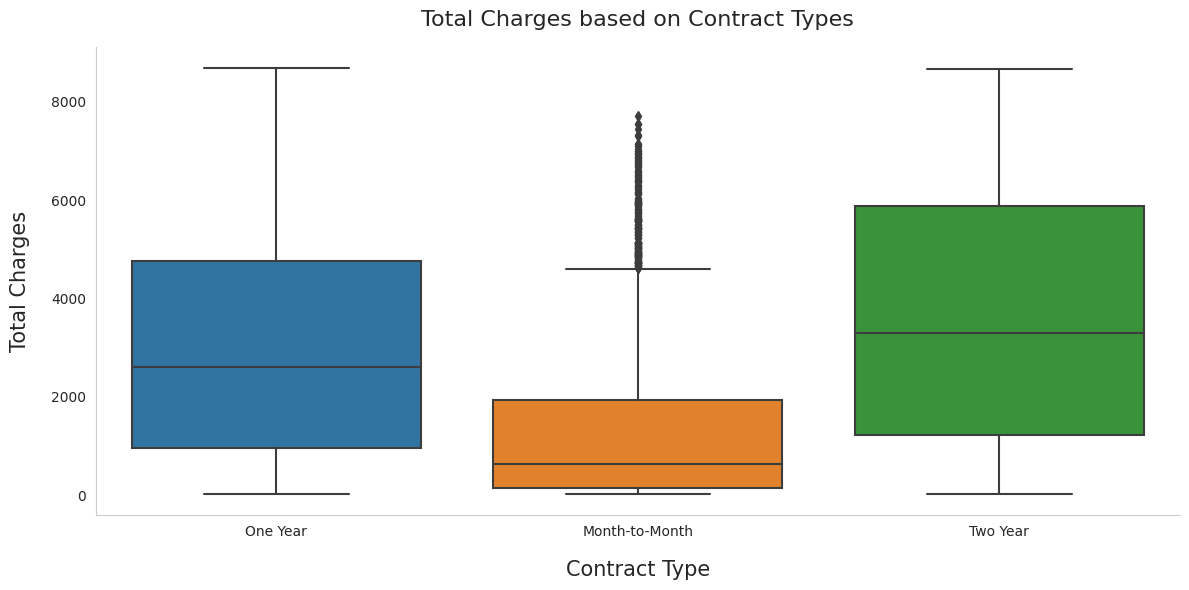

In [ ]:
# Set figure
plt.figure(figsize=(12, 6))

# Create a boxplot with specified modifications
sns.boxplot(x=cvm_cols["Contract"], y=cvm_cols["Total Charges"])

# Set title
plt.title(
    "Total Charges based on Contract Types", fontsize=16, pad=15
)

# Set labels
plt.xlabel("Contract Type", fontsize=15, labelpad=15)
plt.ylabel("Total Charges", fontsize=15, labelpad=15)

# Remove the grid
plt.grid(False)

# Remove the grid and despine the plot
sns.despine()
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
cvm_cols.groupby("Contract")["Total Charges"].describe()

,count,mean,std,min,25%,50%,75%,max
Contract,,,,,,,,
Month-to-Month,3610.0,1301.393823,1566.550717,18.85,147.2375,633.625,1933.7750,7713.55
One Year,1550.0,2988.381929,2214.828338,18.80,967.2875,2612.375,4762.2125,8684.80
Two Year,1883.0,3574.456479,2558.608552,20.35,1227.3750,3297.000,5876.3250,8672.45


#### The grouped statistics for the `Total Charges` column based on different contract types reveal key insights:

▶ **Considerable variability exists in `Total Charges` across contract types,** with 'Two-Year' contracts having the highest mean, indicating potentially higher revenue from customers with longer commitments.

▶ **Month-to-Month contracts show lower mean charges but a wide range of values,** highlighting the flexibility of this contract type and potential volatility in charges. The standard deviations, especially for shorter contract durations, suggest higher variability in charges. However, it's crucial to note that the `Total Charges` column represents a quarterly charge metric.

> 📌 As monthly contract types are present, and another metric, `Monthly Charges,` will be used in creating the Customer Value Metric (CVM) column, **the `Total Charges` column will be disregarded** for the CVM calculation due to its quarterly nature.

### 🔎 `Total Revenue` VS `Monthly Charges`

When constructing the Customer Value Metric (`CVM`), choosing a metric linked to charging, revenue, or profit is crucial for a thorough assessment of customer value.

We'll now analyze `Total Revenue` and `Monthly Charge` to determine the more fitting metric for `CVM`, ensuring it effectively reflects the financial aspects of customer interactions.


In [ ]:
# Calculate summary statistics for Total Revenue and Monthly Charge columns
cvm_cols[["Total Revenue", "Monthly Charge"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Total Revenue,7043.0,3034.379056,2865.204542,21.36,605.61,2108.64,4801.145,11979.34
Monthly Charge,7043.0,63.596131,31.204743,-10.00,30.40,70.05,89.750,118.75


In [ ]:
# Calculate range for Total Revenue and Monthly Charge columns
total_revenue_range = df["Total Revenue"].max() - df["Total Revenue"].min()
monthly_charge_range = df["Monthly Charge"].max() - df["Monthly Charge"].min()

# Calculate interquartile range for Total Revenue and Monthly Charge columns
total_revenue_iqr = round(
    df["Total Revenue"].quantile(0.75) - df["Total Revenue"].quantile(0.25), 2
)
monthly_charge_iqr = round(
    df["Monthly Charge"].quantile(0.75) - df["Monthly Charge"].quantile(0.25), 2
)

# Create a DataFrame
result_df = pd.DataFrame(
    {
        "Measure": ["Range", "IQR"],
        "Total Revenue": [total_revenue_range, total_revenue_iqr],
        "Monthly Charge": [monthly_charge_range, monthly_charge_iqr],
    }
)

# Set 'Measure' as the index for better representation
result_df.set_index("Measure", inplace=True)

result_df

,Total Revenue,Monthly Charge
Measure,,
Range,11957.98,128.75
IQR,4195.54,59.35


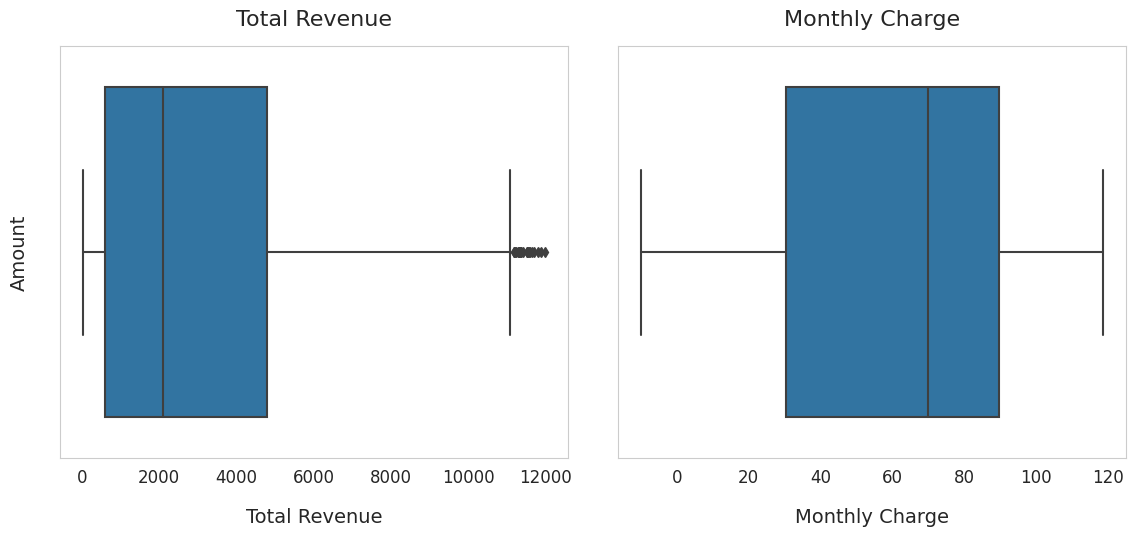

In [ ]:
# Assuming your DataFrame is named 'df'
plt.figure(figsize=(12, 6))

# Box plot for Total Revenue
plt.subplot(1, 2, 1)
sns.boxplot(x=cvm_cols["Total Revenue"])

# Set title and labels
plt.title("Total Revenue", fontsize=16, pad=15)
plt.xlabel("Total Revenue", fontsize=14, labelpad=15)
plt.ylabel("Amount", fontsize=14, labelpad=15)

plt.tick_params(
    axis="both", which="major", labelsize=12
)

# Box plot for Monthly Charge
plt.subplot(1, 2, 2)
sns.boxplot(x=cvm_cols["Monthly Charge"])

# Set title and albels
plt.title("Monthly Charge", fontsize=16, pad=15)
plt.xlabel("Monthly Charge", fontsize=14, labelpad=15)
plt.ylabel("")

plt.tick_params(
    axis="both", which="major", labelsize=12
)

# Adjust layout to add space between subplots
plt.tight_layout(pad=3)

plt.show()

After taking a close look at the **`Total Revenue` it shows that it has a significantly broader range and higher variability compared to `Monthly Charge`**.

The interquartile range (IQR) of `Total Revenue` surpasses that of `Monthly Charge`, indicating a more extensive distribution. As a result :

> **`Monthly Charge` emerges as a potentially more reliable and less variable factor for use in inferring customer value**.

---

#### Why `Monthly Charge` and not `Total Revenue` ?

Considering the descriptive statistics for **`Total Revenue`** and **`Monthly Charge`**.

For **`Total Revenue`**, the range is notably wide, spanning from **21.36** to **11,979.34**, with a standard deviation of approximately **2,865.20**. Additionally, the interquartile range (IQR) is substantial at **4,195.54**, indicating a considerable spread around the median.

In contrast, **`Monthly Charge`** exhibits a much narrower range, ranging from a minimum of **-10.00** to **118.75**. The standard deviation is significantly smaller at approximately **31.20**, and the IQR is **59.35**, suggesting a more concentrated distribution.

### 🔑 Selecting Key Indicators for the CVM

Based on the correlation analysis, the **most predictive indicators** of customer value and retention risk are **Tenure Months**, **Number of Referrals**, and **Monthly Charges**. To integrate these into a composite CVM metric, we can assign **proportional weights** to each factor based on its **correlation strength**.

By combining these variables and applying the correlation-based weights, we can create a Customer Value Metric (CVM) that provides a **more holistic assessment** of each customer's potential lifetime value.

This CVM metric will support **customer segmentation** to **identify high-value customers** we should retain and **potential churn risks** to prioritize for intervention.

To calculate the proportional weight for each variable in the CVM, we can use the following formula:

$${{\text{Proportional Weight}}} = \frac{{\text{Correlation Value}}}{{\text{Sum of Correlation Values}}} \times 100$$

Here are the calculations for the given correlation values:

1. **Tenure in Months:**  
   $$
   {{\text{Proportional Weight}}} = \frac{{0.45}}{{0.45 + 0.31 + 0.14}} \times 100
   $$

2. **Number of Referrals:**
   $$
   {{\text{Proportional Weight}}} = \frac{{0.31}}{{0.45 + 0.31 + 0.14}} \times 100
   $$

3. **Monthly Charge:**  
   $$
   {{\text{Proportional Weight}}} = \frac{{0.14}}{{0.45 + 0.31 + 0.14}} \times 100
   $$

In [ ]:
# Given correlation values
tenure_corr = 0.45
referrals_corr = 0.31
monthly_charge_corr = 0.14

# Calculate sum of correlation values
sum_of_corrs = tenure_corr + referrals_corr + monthly_charge_corr

# Calculate proportional weights
tenure_weight = (tenure_corr / sum_of_corrs) * 100
referrals_weight = (referrals_corr / sum_of_corrs) * 100
monthly_charge_weight = (monthly_charge_corr / sum_of_corrs) * 100

# Display results
print(f"> Tenure in Months Proportional Weight: {tenure_weight:.2f}%\n")
print(f"> Number of Referrals Proportional Weight: {referrals_weight:.2f}%\n")
print(f"> Monthly Charge Proportional Weight: {monthly_charge_weight:.2f}%")

> Tenure in Months Proportional Weight: 50.00%

> Number of Referrals Proportional Weight: 34.44%

> Monthly Charge Proportional Weight: 15.56%


#### 🚻➗ Customer Segmentation

After calculating the correlation-based weights of each column, we can use the `CVM` metric to segment customers into high and low-value groups. By dividing the dataset based on the composite `CVM` score, we can identify:

- 👍 **High-value customers:** Indicating strong retention likelihood and lifetime revenue potential.

- 👎 **Low-value customers:** Highlighting elevated churn risk and low CLV projections.

After segmenting customers into high and low-value groups using the `CVM` metric, we can leverage this segmentation to analyze churn risk and identify patterns in the behavior of churned customers.

By correlating the `CVM` scores with churn metrics, we aim to understand the specific characteristics and trends associated with customers who have churned.

In [ ]:
# Select columns for normalization and calculation
selected_columns = ["Monthly Charge", "Number of Referrals", "Tenure in Months"]

# Min-Max Normalization using NumPy
df_normalized = df[selected_columns].copy()
df_normalized = (df_normalized - df_normalized.min()) / (
    df_normalized.max() - df_normalized.min()
)

# Proportional Weights
weights = np.array([monthly_charge_weight, referrals_weight, tenure_weight]) / 100

# Calculate CVM using NumPy
df["CVM"] = np.dot(df_normalized.values, weights)

In [ ]:
# Display the updated DataFrame with the new 'CVM' column
df["CVM"].describe()

count    7043.000000
mean        0.371071
std         0.232481
min         0.000000
25%         0.159817
50%         0.344109
75%         0.549605
max         0.967297
Name: CVM, dtype: float64

In [ ]:
# Create a new column 'CVM Normalized' and apply min-max normalization
df["CVM Normalized"] = (df["CVM"] - df["CVM"].min()) / (
    df["CVM"].max() - df["CVM"].min()
)

In [ ]:
# Display the DataFrame with the new normalized column
df["CVM Normalized"].describe()

count    7043.000000
mean        0.383617
std         0.240340
min         0.000000
25%         0.165220
50%         0.355743
75%         0.568186
max         1.000000
Name: CVM Normalized, dtype: float64

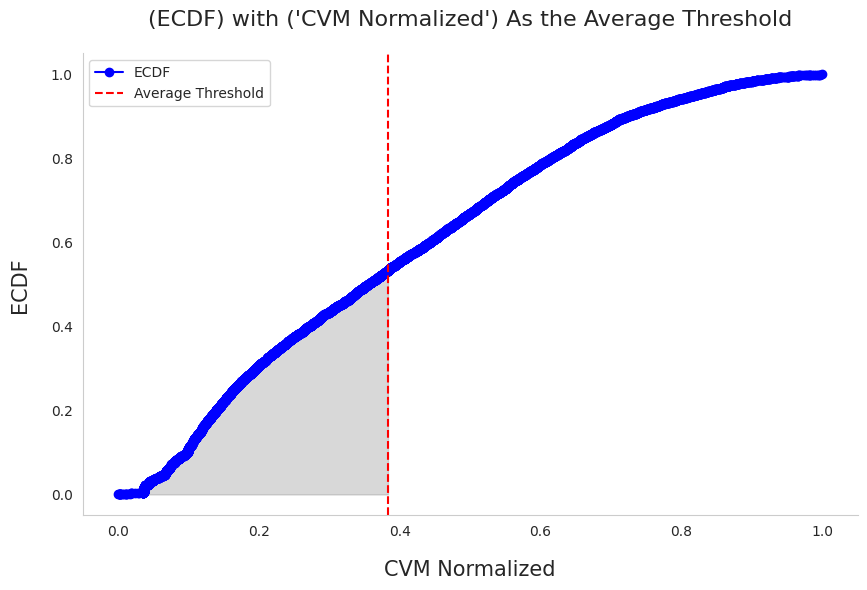

In [ ]:
# Calculate ECDF
def ecdf(data):
    sorted_data = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return sorted_data, y


# Calculate ECDF for CVM Normalized
sorted_cvm, ecdf_values = ecdf(df["CVM Normalized"])

# Calculate average of CVM Normalized
average_cvm_normalized = df["CVM Normalized"].mean()

# Plot ECDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_cvm, ecdf_values, label="ECDF", linestyle="-", marker="o", color="b")
plt.axvline(
    average_cvm_normalized, color="r", linestyle="--", label="Average Threshold"
)

# Highlight the area below the average threshold
plt.fill_between(
    sorted_cvm,
    ecdf_values,
    where=(sorted_cvm <= average_cvm_normalized),
    color="gray",
    alpha=0.3,
)

# Add labels and title
plt.title(
    "(ECDF) with ('CVM Normalized') As the Average Threshold",
    fontsize=16,
    pad=20,
)

# Add labels
plt.xlabel("CVM Normalized", fontsize=15, labelpad=15)
plt.ylabel("ECDF", fontsize=15, labelpad=15)

# Despine the plot
sns.despine()

# Show legend
plt.legend()

# Show the plot
plt.show()

> This ECDF plot visualizes the cumulative distribution of `CVM Normalized` values.
>
> The **blue line** depicts how the values are distributed, with the **red dashed** line denoting the average.

As i will be using the average of the `CVM Normalized` to segment customers into ***'Low Value'*** and ***'High Value'***, the shaded gray area below the average threshold provides insights into values associated with **Low Value Customers**, while values above the average signify characteristics of **High Value Customers**.

**📦 Resources :**

- [Empirical Distribution Function](https://en.wikipedia.org/wiki/Empirical_distribution_function).


In [ ]:
# Average of CVM Normalized
average_cvm_normalized = df["CVM Normalized"].mean()

# Threshold for segmentation
threshold = average_cvm_normalized

# Create a new column 'Customer Segment'
df["Customer Segment"] = np.where(
    df["CVM Normalized"] <= threshold, "Low Value", "High Value"
)

In [ ]:
# Display the DataFrame with the new 'Customer Segment' column
df["Customer Segment"].value_counts(normalize=True) * 100

Low Value     53.286952
High Value    46.713048
Name: Customer Segment, dtype: float64

# 🏃‍♂️ Churn Metric Risk Calculation

The Churn Risk Metric utilizes a deviation approach to assess the risk associated with customer churn. The calculation involves a series of steps to determine the impact of various variables on the likelihood of customer churn.

1. **Calculate the Baseline Churn Ratio (Total Churn Ratio):**
   - Determine the initial churn ratio among customers to establish a baseline for subsequent analysis.

2. **Variable Selection:**
   - Identify and select relevant variables that may influence customer churn. This step is critical for understanding the factors contributing to churn risk.

3. **Deviation Calculation (From the Total Churn Ratio):**
   - Calculate the deviation of each variable from the baseline churn ratio. This enables the assessment of the individual impact of each variable on customer churn.

4. **Churn Risk Rating Calculation:**
   - Compute the Churn Risk Rating by aggregating the deviations from each variable. This step quantifies the overall churn risk associated with the selected variables.

5. **Churn Risk Rating Normalization:**
   - Normalize the Churn Risk Rating for consistency and comparability. This standardization ensures a uniform rating across different variables.

6. **Recategorizing Customer Status:**
   - Based on the Churn Risk Rating, recategorize customer status to reflect the level of churn risk. This categorization facilitates strategic decision-making and targeted interventions.



### 1. **Baseline Churn Ratio 📊**
To initiate the Churn Risk Metric calculation, a baseline churn:stay ratio of `28.37%`:`71.63%` was established. This served as a reference point for comparing deviations in subsequent steps.

In [ ]:
stay_churn_cst = df.query("`Customer Status` != 'Joined'")

stay_churn_cst["Customer Status"].value_counts(normalize=True).round(4) * 100

Stayed     71.63
Churned    28.37
Joined      0.00
Name: Customer Status, dtype: float64

In [ ]:
# Filter out rows where Customer Status is not "Joined"
filtered_df = df[df["Customer Status"] != "Joined"]

# Create a pivot table using the filtered DataFrame
pivot_table = pd.pivot_table(
    filtered_df,
    values="Customer ID",
    index="Customer Status",
    columns="Contract",    # Column goes here
    aggfunc="count",
    margins=True,
    margins_name="Total",
    dropna=False,
)

# Calculate the percentages
percentage_table = (pivot_table / pivot_table.loc["Total"]) * 100

# Format the percentages to have two decimal places
formatted_table = percentage_table.applymap(lambda x: f"{x:.2f}%")

# Display the result
formatted_table

Contract,Month-to-Month,One Year,Two Year,Total
Customer Status,,,,
Churned,51.69%,10.88%,2.58%,28.37%
Joined,0.00%,0.00%,0.00%,0.00%
Stayed,48.31%,89.12%,97.42%,71.63%
Total,100.00%,100.00%,100.00%,100.00%


In [ ]:
# Extracting the churn percentages for each contract type
churn_percentages = percentage_table.loc["Churned"]

# Calculating deviations from the total churned value (28.37%)
total_churned = 28.37

deviations = churn_percentages - total_churned
# Formatting the deviations to have two decimal places
formatted_deviations = deviations.apply(lambda x: f"{x:.2f}%")

# Storing the results in a custom-named DataFrame
deviations_df = pd.DataFrame({"Deviation from Total Churned": formatted_deviations})

# Displaying the results
deviations_df

,Deviation from Total Churned
Contract,
Month-to-Month,23.32%
One Year,-17.49%
Two Year,-25.79%
Total,-0.00%


In [ ]:
from typing import Dict, Union, List, Tuple

def calculate_normalized_churn(
    df: pd.DataFrame, column_name: str
) -> Dict[Union[str, Tuple[float, float]], Tuple[float, float]]:
    """
    Calculate normalized churn and deviations for each unique value in the specified column.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Name of the column to analyze.

    Returns:
    Dict[str, Tuple[float, float]]: A dictionary where each key is associated with a tuple
    containing the normalized churn value and the deviation from the hardcoded total churned value.
    """
    # Filter out rows where Customer Status is not "Joined"
    filtered_df = df[df["Customer Status"] != "Joined"]

    # Create a pivot table using the filtered DataFrame
    pivot_table = pd.pivot_table(
        filtered_df,
        values="Customer ID",
        index="Customer Status",
        columns=column_name,
        aggfunc="count",
        margins=True,
        margins_name="Total",
        dropna=False,
    )

    # Calculate the percentages
    percentage_table = pivot_table / pivot_table.loc["Total"]

    # Extracting the churn percentages for each unique value in the specified column
    churn_percentages = percentage_table.loc["Churned"]

    # Normalizing churn percentages and rounding to 4 decimal places
    normalized_churn = (churn_percentages / churn_percentages.sum()).round(4)

    # Calculating deviations from the hardcoded total churned value (0.2837)
    total_churned = 0.2837 # =~

    deviations = (churn_percentages - total_churned).round(4)
    # deviations = (total_churned - churn_percentages).round(4)

    # Creating a dictionary with column values and their normalized churn values and deviations
    result_dict = dict(zip(normalized_churn.index, zip(normalized_churn, deviations)))

    return result_dict

### 2. **Variable Selection 🔍**
A set of 16 key variables, encompassing factors like contract type, payment method, and offer, was identified as potential influencers of churn risk.

In [ ]:
# List of columns to analyze
columns_list = [
    "Contract",
    "Married",
    "Payment Method",
    "Offer",
    "Number of Referrals",
    "Device Protection Plan",
    "Online Security",
    "Streaming Movies",
    "Streaming Music",
    "Tenure in Months",
    "Internet Type",
    "Internet Service",
    "Paperless Billing",
    "Streaming TV",
    "Premium Tech Support",
    "Online Backup",
]

### 3. **Deviation Calculation ➖➕**
For each variable, the difference between the average churn ratio and the actual churn ratio associated with each variable value was computed. This step gauged the impact of individual variables on the overall churn risk.


In [ ]:
# Calculate deviations for each column
deviations_dict = {}
for column_name in columns_list:
    deviations = calculate_normalized_churn(df, column_name)
    deviations_dict[column_name] = deviations

### 4. **Churn Risk Rating Calculation 📊📈**


In [ ]:
# Summing up the deviations for each row, handling NaN values
df["Churn Risk"] = df.apply(
    lambda row: sum(deviations_dict[column].get(row[column], (0, 0))[1] for column in columns_list),
    axis=1,
)

In [ ]:
df["Churn Risk"].describe()

count    7043.000000
mean        0.397538
std         0.986127
min        -1.683400
25%        -0.411200
50%         0.333000
75%         1.126950
max         2.746000
Name: Churn Risk, dtype: float64

### 5. **Normalization 🔄**
To standardize the churn risk rating, a normalization formula, (x - min) / (max - min), was applied. This transformation ensured a consistent rating scale between 0 and 1, with an average of `0.469801`.

In [ ]:
# Calculate the min and max values of the 'Churn Risk' column
min_churn_risk = df["Churn Risk"].min()
max_churn_risk = df["Churn Risk"].max()

# Normalize the 'Churn Risk' column
df["Churn Risk Normalized"] = (df["Churn Risk"] - min_churn_risk) / (
    max_churn_risk - min_churn_risk
)

In [ ]:
df["Churn Risk Normalized"].describe()

count    7043.000000
mean        0.469801
std         0.222632
min         0.000000
25%         0.287217
50%         0.455231
75%         0.634476
max         1.000000
Name: Churn Risk Normalized, dtype: float64

### 6. **Customer Status Recategorization 🔄📊**
Based on the normalized rating, customer statuses were re-categorized. Ratings higher or lower than the average of `0.469801` led to labels of "safe" or "@ risk," respectively.

In [ ]:
churn_risk_avg = round(df["Churn Risk Normalized"].mean(), 4)

In [ ]:
def calculate_adjusted_status(row: pd.Series, churn_risk_avg: float = churn_risk_avg) -> str:
    """
    Calculate Adjusted Customer Status based on specified conditions.

    Parameters:
    - row (pd.Series): Input DataFrame row.
    - churn_risk_avg (float): Churn risk average threshold.

    Returns:
    str: Adjusted customer status.
    """
    # Extract relevant columns for simplicity
    status = row["Customer Status"]
    churn_risk_normalized = row["Churn Risk Normalized"]

    # Define conditions for each status
    if status == "Churned":
        return "Churned"
    elif status == "Joined" and churn_risk_normalized < churn_risk_avg:
        return "Joined Safe"
    elif status == "Joined" and churn_risk_normalized >= churn_risk_avg:
        return "Joined @ Risk"
    elif status == "Stayed" and churn_risk_normalized <= churn_risk_avg:
        return "Stayed Safe"
    else:
        return "Stayed @ Risk"  # Default case

# Apply the function to create the 'Adjusted Customer Status' column
df["Adjusted Customer Status"] = df.apply(calculate_adjusted_status, axis=1)

## 🗺 Exploring the new `Adjusted Customer Status`

In [ ]:
df["Adjusted Customer Status"].value_counts(normalize=True) * 100

Stayed Safe      48.218089
Churned          26.536987
Stayed @ Risk    18.798807
Joined @ Risk     6.105353
Joined Safe       0.340764
Name: Adjusted Customer Status, dtype: float64

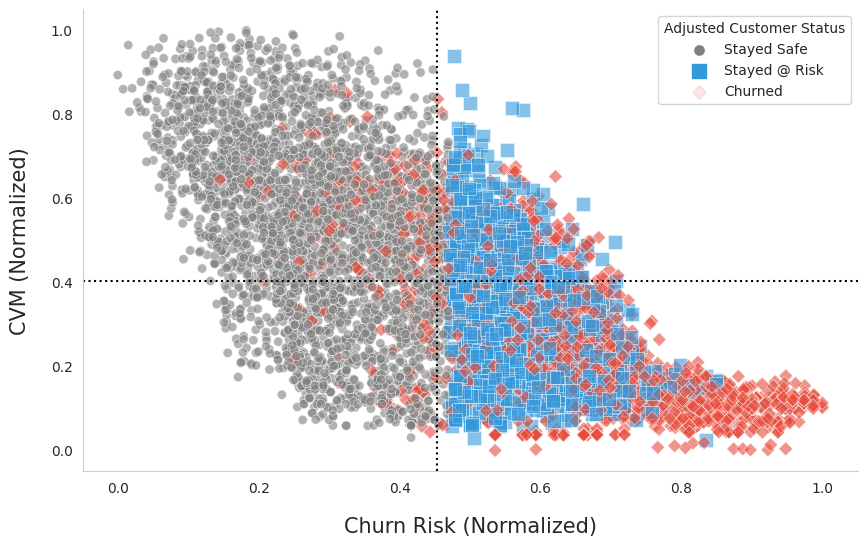

In [ ]:
# Filter out specific values from 'Adjusted Customer Status'
filtered_df = df[~df["Adjusted Customer Status"].isin(["Joined Safe", "Joined @ Risk"])]

# Calculate the average values
average_churn_risk = filtered_df["Churn Risk Normalized"].mean()
average_cst_value_rating = filtered_df["CVM Normalized"].mean()

# Set up the scatter plot with the custom color palette, markers, and transparency
plt.figure(figsize=(10, 6))

# Define a custom color palette for each category
status_palette = {
    "Stayed @ Risk": "#3498db",  # Highlighted Blue
    "Stayed Safe": "#808080",  # Dim Gray
    "Churned": "#e74c3c20",  # Dimmer Red
}

# Define markers for each category
markers = {"Stayed @ Risk": "s", "Stayed Safe": "o", "Churned": "D"}

scatter_plot = sns.scatterplot(
    data=filtered_df,
    x="Churn Risk Normalized",
    y="CVM Normalized",
    hue="Adjusted Customer Status",
    palette=status_palette,
    style="Adjusted Customer Status",  # Use different markers for each category
    markers=markers,
    size="Adjusted Customer Status",  # Use different sizes for each category
    sizes={
        "Stayed @ Risk": 100,
        "Stayed Safe": 45,
        "Churned": 50,
    },  # Adjust size for better visibility
    alpha=0.6,  # Adjust transparency
    legend="full",
)

# Add a horizontal line at the average value of Churn Risk Normalized
scatter_plot.axvline(
    average_churn_risk, color="black", linestyle=":", label="Average Churn Risk"
)

# Add a vertical line at the average value of CVM Normalized
scatter_plot.axhline(
    average_cst_value_rating,
    color="black",
    linestyle=":",
    label="Average CVM",
)

# Declutter the plot - adjust aesthetics for better readability
scatter_plot.set_xlabel("Churn Risk (Normalized)", fontsize=15, labelpad=15)
scatter_plot.set_ylabel("CVM (Normalized)", fontsize=15, labelpad=15)
# scatter_plot.set_title("Customer Churn Risk vs. CVM", fontsize=15, pad=15)

# Despine the plot
sns.despine()

# Show the plot
plt.show()

In [ ]:
filtered_df["Adjusted Customer Status"].value_counts(normalize=True) * 100

Stayed Safe      51.540446
Churned          28.365458
Stayed @ Risk    20.094096
Name: Adjusted Customer Status, dtype: float64

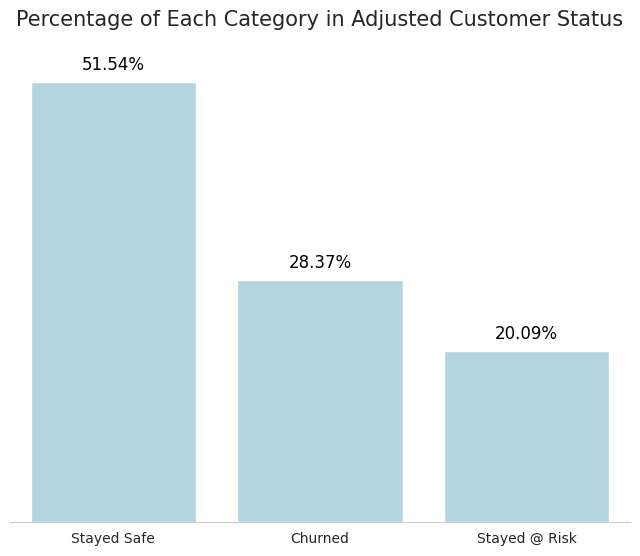

In [ ]:
# Calculate the percentage of each category in 'Adjusted Customer Status'
status_percentage = (
    filtered_df["Adjusted Customer Status"].value_counts(normalize=True) * 100
)

# Set up the bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(
    x=status_percentage.index, y=status_percentage.values, color="lightblue"
)

# Customize the plot
bar_plot.set(xlabel="", ylabel="")
bar_plot.set_title(
    "Percentage of Each Category in Adjusted Customer Status", pad=25, fontsize=15
)

# Despine the plot except the bottom
sns.despine(left=True, bottom=False)

# Remove x-axis and y-axis ticks
bar_plot.set_yticks([])

# Add percentage annotation above each bar with increased font and bold
for index, value in enumerate(status_percentage.values):
    bar_plot.text(
        index,
        value + 1,  # Adjusting the position for annotation
        f"{value:.2f}%",
        ha="center",
        va="bottom",
        color="black",
        fontsize=12,  # Increase font size
    )

# Show the plot
plt.show()

In [ ]:
df.to_csv('tele_churn_data.csv')